In [1]:
import MetaTrader5 as mt5
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf

from typing import List, Optional

In [2]:
mt5.initialize()

True

In [ ]:
pending_orders = mt5.orders_get(symbol='BTCUSD')
for order in pending_orders:
    request = {
        'action': mt5.TRADE_ACTION_REMOVE,
        'order': order.ticket
    }
    mt5.order_send(request)

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\NCPC\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\NCPC\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\NCPC\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\NCPC\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 115, in _read_from_self
 

In [4]:
symbol = 'BTCUSD'
volume = 0.1
stop_price = 57474.37
take_profit = 56680.31

request = {
    "action": mt5.TRADE_ACTION_PENDING,
    "symbol": symbol,
    "volume": volume,
    "type": mt5.ORDER_TYPE_SELL_STOP,
    "price": stop_price,
    "tp": take_profit,
    "deviation": 10,
    "type_time": mt5.ORDER_TIME_GTC,
    "type_filling": mt5.ORDER_FILLING_IOC,
}

result = mt5.order_send(request)
result

OrderSendResult(retcode=10009, deal=0, order=251167655, volume=0.1, price=0.0, bid=58017.97, ask=58019.630000000005, comment='', request_id=1876279934, retcode_external=0, request=TradeRequest(action=5, magic=0, order=0, symbol='BTCUSD', volume=0.1, price=57474.37, stoplimit=0.0, sl=0.0, tp=56680.31, deviation=10, type=5, type_filling=1, type_time=0, expiration=0, comment='', position=0, position_by=0))

In [ ]:
mt5.positions_get(symbol='BTCUSD')

()

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\NCPC\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\NCPC\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\NCPC\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\NCPC\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 115, in _read_from_self
 

In [ ]:
symbol = 'BTCUSD'
positions = mt5.positions_get(symbol=symbol)
info_tick = mt5.symbol_info_tick(symbol)
order_type = {
    0: mt5.ORDER_TYPE_SELL,
    1: mt5.ORDER_TYPE_BUY
}
price = {
    0: info_tick.bid,
    1: info_tick.ask
}

for position in positions[:-1]:
    request = dict(
        action=mt5.TRADE_ACTION_DEAL,
        type=order_type[position.type],
        price=price[position.type],
        symbol=position.symbol,
        volume=position.volume,
        position=position.ticket,
    )
    mt5.order_send(request)

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\NCPC\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\NCPC\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Users\NCPC\AppData\Local\Programs\Python\Python310\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\NCPC\AppData\Local\Programs\Python\Python310\lib\asyncio\selector_events.py", line 115, in _read_from_self
 

In [4]:
positions = mt5.positions_get()
position = positions[0]
position
# request = dict(
#     action=mt5.TRADE_ACTION_DEAL,
#     type=mt5.ORDER_TYPE_SELL,
#     price=mt5.symbol_info_tick(position.symbol).bid,
#     symbol=position.symbol,
#     volume=position.volume,
#     position=position.ticket,
# )

# mt5.order_send(request)

TradePosition(ticket=245914614, time=1724740886, time_msc=1724740886729, time_update=1724740886, time_update_msc=1724740886729, type=1, magic=0, identifier=245914614, reason=3, volume=0.45, price_open=62819.39, sl=0.0, tp=0.0, price_current=62860.47, swap=0.0, profit=-18.48, symbol='BTCUSD', comment='', external_id='')

In [3]:
mt5.ORDER_TYPE_BUY, mt5.ORDER_TYPE_SELL

(0, 1)

In [3]:
def get_highest_pivot_bar(df: pd.DataFrame, pivot_bar: pd.Series, window_size: int = 2) -> pd.Series:
    left_bars = df[df['time'] < pivot_bar['time']].tail(window_size)
    right_bars = df[df['time'] > pivot_bar['time']].head(window_size)

    merged_df = pd.concat([left_bars, right_bars])
    highest_bar = merged_df.nlargest(1, 'high')
    highest_bar = highest_bar.iloc[-1]

    return pivot_bar if highest_bar['high'] < pivot_bar['high'] else highest_bar

def get_lowest_pivot_bar(df: pd.DataFrame, pivot_bar: pd.Series, window_size: int = 2) -> pd.Series:
    left_bars = df[df['time'] < pivot_bar['time']].tail(window_size)
    right_bars = df[df['time'] > pivot_bar['time']].head(window_size)
    
    merged_df = pd.concat([left_bars, right_bars])
    lowest_bar = merged_df.nsmallest(1, 'low')
    lowest_bar = lowest_bar.iloc[-1]

    return pivot_bar if lowest_bar['low'] > pivot_bar['low'] else lowest_bar

def is_bearish_divergence(df: pd.DataFrame, current_pivot_high: pd.Series) -> Optional[pd.Series]:
    nearest_rsi_pivot_high = df[(df['rsi_pivot_high']) & (df['time'] < current_pivot_high['time']) & (df['rsi'] > current_pivot_high['rsi'])]
        
    if not nearest_rsi_pivot_high.empty:
        nearest_rsi_pivot_high = nearest_rsi_pivot_high.iloc[-1]
        
        if nearest_rsi_pivot_high['rsi'] > 60:
            current_pivot_high = get_highest_pivot_bar(df, current_pivot_high)
            nearest_pivot_high_candle = get_highest_pivot_bar(df, nearest_rsi_pivot_high)
            
            if current_pivot_high['high'] > nearest_pivot_high_candle['high']:
                return nearest_rsi_pivot_high
    
    return None

def is_bullish_divergence(df: pd.DataFrame, current_pivot_low: pd.Series) -> Optional[pd.Series]:
    nearest_rsi_pivot_low = df[(df['rsi_pivot_low']) & (df['time'] < current_pivot_low['time']) & (df['rsi'] < current_pivot_low['rsi'])]
    if not nearest_rsi_pivot_low.empty:
        nearest_rsi_pivot_low = nearest_rsi_pivot_low.iloc[-1]

        if nearest_rsi_pivot_low['rsi'] < 40:
            current_pivot_low = get_lowest_pivot_bar(df, current_pivot_low)
            nearest_pivot_low_candle = get_lowest_pivot_bar(df, nearest_rsi_pivot_low)

            if current_pivot_low['low'] < nearest_pivot_low_candle['low']:
                return nearest_rsi_pivot_low
            
    return None
    
def detect_divergence(df: pd.DataFrame):
    price_lines = []
    rsi_lines = []
    
    for _, current_candle in df.iterrows():
        if current_candle['rsi_pivot_low']:
            bullish_divergence_point = is_bullish_divergence(df, current_candle)
            if bullish_divergence_point is not None:
                rsi_lines.append([
                    (bullish_divergence_point['time'], bullish_divergence_point['rsi']),
                    (current_candle['time'], current_candle['rsi'])
                ])
                
                current_candle = get_lowest_pivot_bar(df, current_candle, 3)
                nearest_pivot_low_candle = get_lowest_pivot_bar(df, bullish_divergence_point, 3)
                price_lines.append([
                    (nearest_pivot_low_candle['time'], nearest_pivot_low_candle['low']),
                    (current_candle['time'], current_candle['low'])
                ])

        if current_candle['rsi_pivot_high']:
            bearish_divergence_point = is_bearish_divergence(df, current_candle)
            if bearish_divergence_point is not None:
                rsi_lines.append([
                    (bearish_divergence_point['time'], bearish_divergence_point['rsi']),
                    (current_candle['time'], current_candle['rsi'])
                ])

                current_candle = get_highest_pivot_bar(df, current_candle, 3)
                nearest_pivot_high_candle = get_highest_pivot_bar(df, bearish_divergence_point, 3)
                price_lines.append([
                    (nearest_pivot_high_candle['time'], nearest_pivot_high_candle['high']),
                    (current_candle['time'], current_candle['high'])
                ])

    return price_lines, rsi_lines

In [4]:
rates = mt5.copy_rates_from_pos('BTCUSD', mt5.TIMEFRAME_M5, 0, 1000)

df = pd.DataFrame(rates)
df['time'] = pd.to_datetime(df['time'], unit='s')

bb = ta.bbands(df['close'], 20, 2)

df['bb_l'] = bb.iloc[:,0]
df['bb_u'] = bb.iloc[:,2]

df['position'] = (df['close'] - df['bb_l']) / (df['bb_u'] - df['bb_l'])

df.tail(40)

,time,open,high,low,close,tick_volume,spread,real_volume,bb_l,bb_u,position
960,2024-08-19 23:15:00,59169.00,59305.66,59154.94,59288.70,442,43,0,59030.159855,59308.853145,0.927687
961,2024-08-19 23:20:00,59288.70,59323.47,59242.85,59323.47,584,31,0,59022.086261,59324.408739,0.996895
962,2024-08-19 23:25:00,59323.47,59581.92,59292.40,59404.30,1062,33,0,59004.051139,59366.819861,1.103317
963,2024-08-19 23:30:00,59404.30,59499.27,59389.83,59451.03,688,63,0,58986.210932,59414.610068,1.085014
964,2024-08-19 23:35:00,59451.03,59451.03,59352.00,59352.01,642,65,0,59012.901962,59422.305038,0.828299
965,2024-08-19 23:40:00,59352.02,59439.50,59350.54,59403.89,357,79,0,59027.361569,59441.859431,0.908397
966,2024-08-19 23:45:00,59403.89,59510.16,59385.06,59501.54,647,65,0,59023.645618,59483.989382,1.038125
967,2024-08-19 23:50:00,59488.57,59669.31,59482.17,59594.70,995,47,0,59008.244903,59544.327097,1.093965
968,2024-08-19 23:55:00,59594.70,59602.13,59479.32,59484.94,934,47,0,59015.114848,59569.742152,0.847101
969,2024-08-20 00:00:00,59484.72,59533.44,59454.30,59503.89,741,47,0,59039.651672,59587.564328,0.847285


In [5]:

df['rsi'] = ta.rsi(df['close'], 14)
df['atr'] = ta.atr(df['high'], df['low'], df['close'], 14)

df.dropna(inplace=True)
df.set_index(df['time'], inplace=True)

window_size = 5
df['rsi_pivot_high'] = df['rsi'] == df['rsi'].rolling(2 * window_size + 1, center=True).max()
df['rsi_pivot_low'] = df['rsi'] == df['rsi'].rolling(2 * window_size + 1, center=True).min()


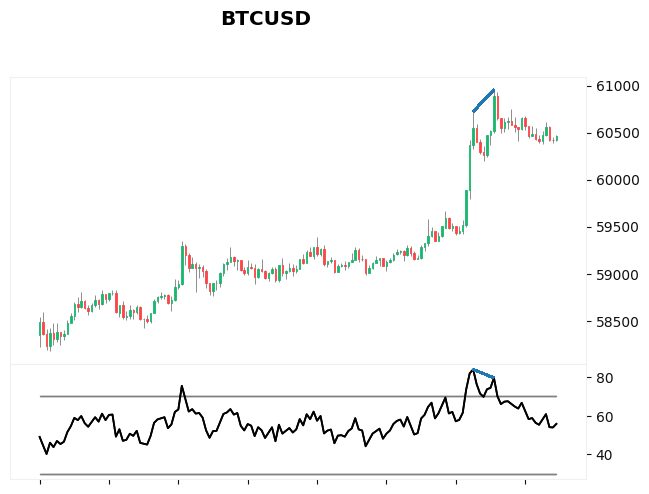

In [27]:
df = df.tail(150)
price_lines, rsi_lines = detect_divergence(df)
price_lines, rsi_lines = price_lines[-1], rsi_lines[-1]

plots = [
    mpf.make_addplot(df['rsi'], panel=1, color='black', fill_between=dict(y1=30, y2=30, color="gray")),
    mpf.make_addplot(df['rsi'], panel=1, color='black', fill_between=dict(y1=70, y2=70, color="gray")),
]

style = mpf.make_mpf_style(base_mpf_style='yahoo', rc={'grid.alpha':0}, figcolor='#fff', facecolor="#fff")
_, axs = mpf.plot(
    df,
    title='BTCUSD',
    type='candle',
    style=style,
    volume=False,
    ylabel='',
    ylabel_lower='',
    datetime_format='',
    addplot=plots,
    returnfig=True,
    alines=dict(alines=price_lines))

rsi_lines = mpf._utils._construct_aline_collections(dict(alines=rsi_lines), df.index)
axs[2].add_collection(rsi_lines);

import matplotlib.pyplot as plt
plt.savefig('test.png', bbox_inches='tight')
plt.close()

In [8]:
symbol = 'BTCUSD'
risk_amount = 30
order_type = mt5.ORDER_TYPE_SELL
info_tick = mt5.symbol_info_tick(symbol)
atr = df['atr'].iloc[-2]

entry = 0
stop_loss = 0

match order_type:
    case mt5.ORDER_TYPE_BUY:
        entry = info_tick.ask
        stop_loss = entry - atr * 5
    case mt5.ORDER_TYPE_SELL:
        entry = info_tick.bid
        stop_loss = entry + atr * 5

trade_volume = risk_amount / abs(entry - stop_loss)
trade_volume = round(trade_volume, 2)

request = {
    'action': mt5.TRADE_ACTION_DEAL,
    'symbol': symbol,
    'deviation': 10,
    'type': order_type,
    'volume': trade_volume,
    'price': entry,
    'sl': stop_loss
}
result = mt5.order_send(request)
result

OrderSendResult(retcode=10009, deal=156569646, order=208562880, volume=0.03, price=63165.37, bid=63165.37, ask=63168.75, comment='', request_id=2384262747, retcode_external=0, request=TradeRequest(action=1, magic=0, order=0, symbol='BTCUSD', volume=0.03, price=63165.37, stoplimit=0.0, sl=64188.99960187674, tp=0.0, deviation=10, type=1, type_filling=0, type_time=0, expiration=0, comment='', position=0, position_by=0))

In [12]:
positions = mt5.positions_get(symbol="ETHUSD")
positions

# 2616.03

(TradePosition(ticket=241787641, time=1724325602, time_msc=1724325602768, time_update=1724325602, time_update_msc=1724325602768, type=1, magic=0, identifier=241787641, reason=3, volume=4.83, price_open=2636.7400000000002, sl=2616.03, tp=2583.0, price_current=2597.92, swap=0.0, profit=187.5, symbol='ETHUSD', comment='', external_id=''),)

In [7]:
request = {
    'action': mt5.TRADE_ACTION_SLTP,
    'position': positions[0].ticket,
    'sl': 1.29835,
    'commnet': 'test'
}
result = mt5.order_send(request)
result

OrderSendResult(retcode=10009, deal=0, order=0, volume=0.2, price=1.30012, bid=1.3001200000000002, ask=1.3001200000000002, comment='', request_id=2384262769, retcode_external=0, request=TradeRequest(action=6, magic=0, order=0, symbol='', volume=0.0, price=0.0, stoplimit=0.0, sl=1.29835, tp=0.0, deviation=0, type=0, type_filling=0, type_time=0, expiration=0, comment='', position=210024869, position_by=0))

In [9]:
request = {
    'action': mt5.TRADE_ACTION_MODIFY,
    'position': positions[0].ticket,
    # 'sl': 1.29835,
    'commnet': 'test'
}
result = mt5.order_send(request)
result

OrderSendResult(retcode=10013, deal=0, order=0, volume=0.0, price=0.0, bid=0.0, ask=0.0, comment='Invalid request', request_id=0, retcode_external=0, request=TradeRequest(action=7, magic=0, order=0, symbol='', volume=0.0, price=0.0, stoplimit=0.0, sl=0.0, tp=0.0, deviation=0, type=0, type_filling=0, type_time=0, expiration=0, comment='', position=210024869, position_by=0))